In [28]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# 높이 너비 채널 형식의 이미지를 텐서화 채널 높이 너비 형식으로 바꾸기위함
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((32,32))
])

In [29]:
train_dataset = datasets.FashionMNIST(root = '../data',train=True,download=True,transform=transform)
test_dataset = datasets.FashionMNIST(root='../data',train=False,download=True,transform=transform)

train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=True)

Text(0.5, 1.0, 'Label : Pullover')

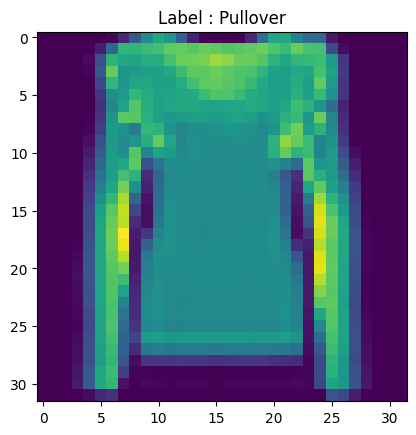

In [30]:
import matplotlib.pyplot as plt
import random

sample_idx = random.randint(0, len(train_dataset) -1)

image, label = train_dataset[sample_idx]
image_np = image.permute(1,2,0).numpy()

plt.imshow(image_np)
plt.title(f'Label : {train_dataset.classes[label]}')

In [31]:
train_dataset[0][0].shape

torch.Size([1, 32, 32])

In [ ]:
class lenet(nn.Module):

    def __init__(self):
       super().__init__()

       self.net = nn.Sequential(
              nn.Conv2d(1,6,kernel_size=5,stride=1,padding=0),# 28x28x6
              nn.ReLU(),nn.MaxPool2d(kernel_size=2,stride=2), # 14x14x6
              nn.Conv2d(6,16,kernel_size=5,stride=1,padding=0),#8x8x16
              nn.ReLU(),nn.MaxPool2d(kernel_size=2,stride=2,padding=0), # 4x4x16
              nn.Flatten(),
              nn.Linear(400,120),nn.ReLU(),
              nn.Linear(120,84),nn.ReLU(),
              nn.Linear(84,10)
       )

    def forward(self,x):
           return self.net(x)

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = lenet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [34]:
num_epochs = 5
patience = 10
best_acc = 0 
counter = 0 
for epoch in range(num_epochs + 1):
    model.train()
    
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        
        output = model(data)
        optimizer.zero_grad()
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
    
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for test_data, test_target in test_loader:
            test_data, test_target = test_data.to(device), test_target.to(device)
            test_output = model(test_data)
            pred_target = torch.argmax(test_output, axis = 1)
            test_correct += (pred_target == test_target).sum().item()
            test_total += test_target.size(0)
    acc = test_correct / test_total
    print(f'{epoch:4d}/{num_epochs} Epoch | Test Accuracy : {acc * 100:.2f}%')        
    
        # 베스트 모델 저장 & 조기 종료
    if acc > best_acc:
        best_acc = acc
        torch.save(model.state_dict(), 'best_model.pt')
    else:
        counter += 1
    
    if counter >= patience:
        print('조기 종료')
        break

   0/5 Epoch | Test Accuracy : 81.75%
   1/5 Epoch | Test Accuracy : 86.32%
   2/5 Epoch | Test Accuracy : 86.60%
   3/5 Epoch | Test Accuracy : 88.46%
   4/5 Epoch | Test Accuracy : 89.10%
   5/5 Epoch | Test Accuracy : 89.21%
